In [32]:
# RNN
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# LSTM
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers.embeddings import Embedding
from keras.layers import Dense, LSTM


import numpy as np
# import matplotlib.pyplot as plt

# Recurrent Neural Network

In [4]:
#  시계열 데이터 생성
s = np.sin(2*np.pi/8*np.linspace(0,20,100))

X, y = [], []

for i in range(3, len(s)):
  X.append(np.array([s[i-j] for j in range(3,0,-1)]))
  y.append(s[i])

X = np.array(X).reshape(len(X), 3, 1)
y = np.array(y).reshape(len(y), 1)

In [34]:
model = Sequential()
model.add(SimpleRNN(units=10, input_shape=(3,1)))
model.add(Dense(units=1, activation='tanh'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy']) # accuracy 말고 다른거 사용해야 함

In [22]:
hstr = model.fit(X, y, epochs=10, batch_size=10, verbose=2)

Epoch 1/10
10/10 - 0s - loss: 0.0256 - accuracy: 0.0000e+00
Epoch 2/10
10/10 - 0s - loss: 0.0247 - accuracy: 0.0000e+00
Epoch 3/10
10/10 - 0s - loss: 0.0240 - accuracy: 0.0000e+00
Epoch 4/10
10/10 - 0s - loss: 0.0233 - accuracy: 0.0000e+00
Epoch 5/10
10/10 - 0s - loss: 0.0228 - accuracy: 0.0000e+00
Epoch 6/10
10/10 - 0s - loss: 0.0222 - accuracy: 0.0000e+00
Epoch 7/10
10/10 - 0s - loss: 0.0217 - accuracy: 0.0000e+00
Epoch 8/10
10/10 - 0s - loss: 0.0212 - accuracy: 0.0000e+00
Epoch 9/10
10/10 - 0s - loss: 0.0207 - accuracy: 0.0000e+00
Epoch 10/10
10/10 - 0s - loss: 0.0203 - accuracy: 0.0000e+00


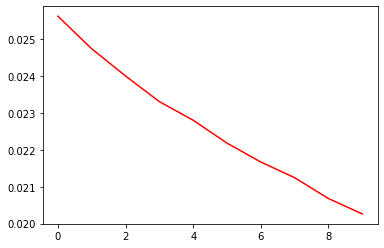

In [24]:
plt.plot(hstr.history['loss'], color ='red')
plt.show()

In [28]:
y_pred = model.predict(X)

print(y_pred)

[[ 0.39685032]
 [ 0.53216195]
 [ 0.62910527]
 [ 0.6961712 ]
 [ 0.741879  ]
 [ 0.7723235 ]
 [ 0.79143685]
 [ 0.8015978 ]
 [ 0.8040162 ]
 [ 0.79890376]
 [ 0.7854771 ]
 [ 0.7618037 ]
 [ 0.7245136 ]
 [ 0.6684944 ]
 [ 0.5869478 ]
 [ 0.472621  ]
 [ 0.3211851 ]
 [ 0.13639347]
 [-0.06634796]
 [-0.262648  ]
 [-0.42931607]
 [-0.55579644]
 [-0.645437  ]
 [-0.70722264]
 [-0.74921054]
 [-0.776969  ]
 [-0.79404545]
 [-0.80254316]
 [-0.8034552 ]
 [-0.7967973 ]
 [-0.7815797 ]
 [-0.75562364]
 [-0.71525764]
 [-0.6550397 ]
 [-0.56795806]
 [-0.4469924 ]
 [-0.2889068 ]
 [-0.09943457]
 [ 0.10398852]
 [ 0.29629728]
 [ 0.45592096]
 [ 0.57513356]
 [ 0.6589927 ]
 [ 0.7166196 ]
 [ 0.7556271 ]
 [ 0.78116584]
 [ 0.79648423]
 [ 0.8034607 ]
 [ 0.80289555]
 [ 0.79461074]
 [ 0.7773902 ]
 [ 0.7487664 ]
 [ 0.7047016 ]
 [ 0.63935965]
 [ 0.54551005]
 [ 0.41652787]
 [ 0.2506783 ]
 [ 0.05620738]
 [-0.14711043]
 [-0.33382636]
 [-0.48478353]
 [-0.5955983 ]
 [-0.67298764]
 [-0.72602826]
 [-0.7617848 ]
 [-0.78493583]
 [-0.79839

# Long Short-Term Memory

RNN의 문제점

- 입력 시퀀스가 길어질 수록 타임 스텝의 수가 많으므로 네트워크가 깊어진다

- 즉 깊어질수록 출력과 먼 앞부분의 학습이 잘 안되는 그래디언트 소실이 발생함

- 이를 장기 의존성 long-term dependencies 문제라고 부름

LSTM

- long-term dependencies 해결을 위해 도입된 발전형 RNN

- gate 개념이 추가됨

In [30]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [31]:
X_train = sequence.pad_sequences(X_train, maxlen=50)
X_test = sequence.pad_sequences(X_test, maxlen=50)

In [36]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=50))
model.add(LSTM(units=100))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 32)            320000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 373,301
Trainable params: 373,301
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
hstr = model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=2)

Epoch 1/10
391/391 - 18s - loss: 0.4759 - accuracy: 0.7625
Epoch 2/10
391/391 - 18s - loss: 0.3277 - accuracy: 0.8573
Epoch 3/10
391/391 - 18s - loss: 0.2780 - accuracy: 0.8856
Epoch 4/10
391/391 - 18s - loss: 0.2310 - accuracy: 0.9094
Epoch 5/10
391/391 - 18s - loss: 0.1820 - accuracy: 0.9301
Epoch 6/10
391/391 - 17s - loss: 0.1417 - accuracy: 0.9482
Epoch 7/10
391/391 - 20s - loss: 0.1067 - accuracy: 0.9630
Epoch 8/10
391/391 - 18s - loss: 0.0814 - accuracy: 0.9736
Epoch 9/10
391/391 - 18s - loss: 0.0622 - accuracy: 0.9794
Epoch 10/10
391/391 - 18s - loss: 0.0505 - accuracy: 0.9841


In [39]:
loss, acc = model.evaluate(X_test, y_test)

print('손실값 :',loss)
print('정확도 :',acc)

782/782 [==============================] - 8s 10ms/step - loss: 0.8795 - accuracy: 0.7747


In [40]:
model.predict(X_test)

array([[0.92759615],
       [0.99980116],
       [0.4116592 ],
       ...,
       [0.02453375],
       [0.00368351],
       [0.99978083]], dtype=float32)

In [41]:
np.argmax(model.predict(X_test),axis=1)

array([0, 0, 0, ..., 0, 0, 0])